In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

RAND=10

# Регрессия

Этот набор данных представляет собой запись о 7 распространенных различных видах рыб, продаваемых на рыбном рынке. С помощью этого набора данных можно обучить модель, которая будет предсказывать **вес рыбы**.

- Weight - weight of fish in Gram g
- Length1 - vertical length in cm
- Length2 - diagonal length in cm
- Length3 - cross length in cm
- Height - height in cm
- Width - diagonal width in cm

## EDA

1) Импортируйте файл Fish.csv, записав в переменную **df**

In [2]:
df = pd.read_csv('Fish.csv')

2) Вывести первые пять строк

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


3) Выведите размер датасета

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


4) Вывести общую информацию о датафрейме при помощи метода info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


5) Вывести основные описательные статистики для числовых и категориальных признаков

In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


6) Постройте тепловую карту для оценки **корреляции признаков**, что можно сказать на основании графика?

C:\Users\maxim\AppData\Local\Temp\ipykernel_13132\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

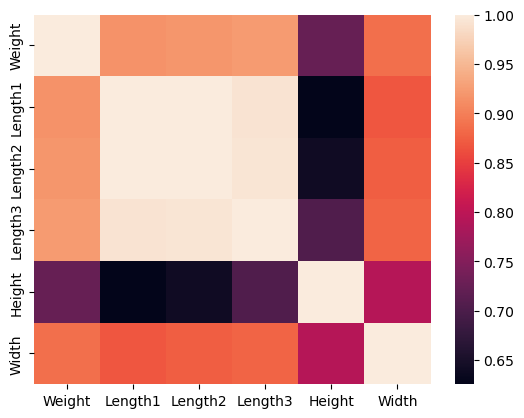

In [7]:
sns.heatmap(df.corr())

7) Удалите скоррелированные числовые признаки, где корреляция больше 0.9, при помощи кода ниже, где:
- df - исходный датасет
- to_drop - колонки, которые необходимо удалить

**Результат запишите в переменную df_clean**, переменную df в данном случае оставьте без изменений

In [8]:
cor_matrix = df.drop(['Weight'], axis=1).corr().abs()

upper_tri = cor_matrix.where(
    np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

to_drop = [
    column for column in upper_tri.columns if any(upper_tri[column] > 0.9)
]

C:\Users\maxim\AppData\Local\Temp\ipykernel_13132\754978559.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.drop(['Weight'], axis=1).corr().abs()


In [9]:
df_clean = df.drop(to_drop, axis=1).corr().abs()
df_clean

C:\Users\maxim\AppData\Local\Temp\ipykernel_13132\3943514921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean = df.drop(to_drop, axis=1).corr().abs()


,Weight,Length1,Height,Width
Weight,1.000000,0.915712,0.724345,0.886507
Length1,0.915712,1.000000,0.625378,0.867050
Height,0.724345,0.625378,1.000000,0.792881
Width,0.886507,0.867050,0.792881,1.000000


8) Проанализируйте **целевую переменную Weight в df_clean**, что вы можете сказать о распределении? Нормально ли оно? проверьте при помощи стат метода

Не нормальное

9) Если распределение не нормальное, то **прологарифмируйте**  таргет Weight с **добавлением внутри единицы**, **записав значения в новую колонку Weight_log** в переменнной df_clean

Проверьте, стало ли распределение нормальным при помощи стат метода.

> Если распределение не стало полностью нормальным, то ничего страшного. Для таких целей обычно используют функцию потерь устойчивую к выбросам, но мы возьмем прологарифмированную целевую переменную и представим, что распрееление все-так стало нормальным.

In [10]:
import math

#df_clean['Weight_log'] = math.log(df_clean['Weight'])

In [11]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


10) Создайте новую переменную **df_label**, присвойте ей трансформированный датасет df_clean при помощи One-hot кодирования (лучше использовать pandas.get_dummies() для бинаризации)

Примените drop_first = True

In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ins = pd.get_dummies(df, columns=['Height', 'Weight'], drop_first=True)
df_label = ohe.fit_transform(df)
df_label

<159x747 sparse matrix of type '<class 'numpy.float64'>'
	with 1113 stored elements in Compressed Sparse Row format>

## Modeling

11) Разбиение данных на train/test

- Разбейте данные на тренировочные и тестовые test_size=0.25
- Установите константу RAND = 10 в самом начале и используйте далее как random_state
- **Не забывайте про стандартизацию**
- Не забывайте, что нужно для записи в переменную X удалить целевые переменные 'Weight', 'Weight_log'
- Если вы логарифмировали y_test, то незабудьте создать к примеру новую переменную y_test_exp (произвести **ПОТЕНЦИОНИРОВАНИЕ**), чтобы правильно анализировать значения метрик

> Как сделать потенционирование? При условии, что при логарифмировании добавляли единицу
```python
y_test_exp = np.exp(y_test) - 1
```

In [23]:
y = df['Weight']
df = df.drop(columns='Weight')
df = df.drop(columns='Species')
#df
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.2, random_state=64)

In [25]:
X_train

,Length1,Length2,Length3,Height,Width
92,20.5,22.5,24.0,6.7920,3.6240
151,11.3,11.8,13.1,2.2139,1.2838
148,10.4,11.0,12.0,2.1960,1.3800
79,17.2,19.0,20.2,5.6358,3.0502
134,40.0,42.5,45.5,7.2800,4.3225
...,...,...,...,...,...
48,22.0,24.0,27.2,7.5344,3.8352
85,19.3,21.3,22.8,6.3840,3.5340
51,23.6,25.2,27.9,7.0866,3.9060
54,29.5,31.7,35.0,9.4850,5.3550


12) Необходимо реализовать алгоритм Linear Regression при помощи метода оптимизации **стохастический градиентный спуск**

Необходимо взять пример из лекции, где реализована линейная регрессия без использования sklearn, и немного поменять алгоритм.

- Не забываем, что нам нет необходимости суммировать результат по всей выборке! Смотреть формулу из презентации
- А также будьте аккуратны при вычитании антиградиента (не будет нормирования на всю длину X)!

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
def r2_adjusted(y_true: np.ndarray, y_pred: np.ndarray,
                X_test: np.ndarray) -> float:
    """Коэффициент детерминации (множественная регрессия)"""
    N_objects = len(y_true)
    N_features = X_test.shape[1]
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (N_objects - 1) / (N_objects - N_features - 1)


def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Mean percentage error"""
    return np.mean((y_true - y_pred) / y_true) * 100


def mape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Mean absolute percentage error"""
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


def wape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Weighted Absolute Percent Error"""
    return np.sum(np.abs(y_pred - y_true)) / np.sum(y_true) * 100


def huber_loss(y_true: np.ndarray, y_pred: np.ndarray, delta: float = 1.345):
    """Функция ошибки Хьюбера"""
    assert len(y_true) == len(y_pred), 'Разные размеры данных'
    huber_sum = 0
    for i in range(len(y_true)):
        if abs(y_true[i] - y_pred[i]) <= delta:
            huber_sum += 0.5 * (y_true[i] - y_pred[i])**2
        else:
            huber_sum += delta * (abs(y_true[i] - y_pred[i]) - 0.5 * delta)
    huber_sum /= len(y_true)
    return huber_sum


def logcosh(y_true: np.ndarray, y_pred: np.ndarray):
    """функция ошибки Лог-Кош"""
    return np.sum(np.log(np.cosh(y_true - y_pred)))


def rmsle(y_true: np.ndarray, y_pred: np.ndarray) -> np.float64:
    """
    The Root Mean Squared Log Error (RMSLE) metric 
    Логаритмическая ошибка средней квадратичной ошибки
    """
    try:
        return np.sqrt(mean_squared_log_error(y_true, y_pred))
    except:
        return None


def get_metrics(y_test: np.ndarray,
                y_pred: np.ndarray,
                X_test: np.ndarray,
                name: str = None,
                delta: float = 1.345):
    """Генерация таблицы с метриками"""
    df_metrics = pd.DataFrame()

    df_metrics['model'] = [name]

    df_metrics['MAE'] = mean_absolute_error(y_test, y_pred)
    df_metrics['MSE'] = mean_squared_error(y_test, y_pred)
    df_metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
    df_metrics['RMSLE'] = rmsle(y_test, y_pred)
    df_metrics['R2 adjusted'] = r2_adjusted(y_test, y_pred, X_test)
    # df_metrics['Huber_loss'] = huber_loss(y_test, y_pred, delta)
    # df_metrics['Logcosh'] = logcosh(y_test, y_pred)
    df_metrics['MPE_%'] = mpe(y_test, y_pred)
    df_metrics['MAPE_%'] = mape(y_test, y_pred)
    df_metrics['WAPE_%'] = wape(y_test, y_pred)

    return df_metrics

13) Обучите разработанную модель линейной регрессии с использованием следующих значений параметров на train выборке:
    
- learning_rate=0.001
- eps=0.0000001
- iters=4000

In [28]:
model.fit(X_train, y_train)

LinearRegression()

14) Какие результаты по основным метрикам вы получили на test? Что можно сказать про модель?

- Не забудьте преобразовать обратно целевую переменную (потенционирование) для анализа метрик (для y_test и y_predict), но **в обучении участвуют прологарифмированные данные**.

- На какую метрику **более релевантно смотреть на основании распределения целевой перменной**?
- На подобие как и в лекции, сделайте отдельный вывод метрик в DataFrame и запишите **результат в переменную metrics**
- Если вы получили большие значения метрик (применимо и далее), проверьте, сделали ли вы потенционирование, а также проверьте сам алгоритм оптимизации внутри LR

In [33]:
model.predict(y_val)

C:\Users\maxim\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1000.   340.     9.8  145.   265.   900.     7.   700.   150.   200.
  975.   850.    85.   390.    12.2  200.    12.2  685.   700.   920.
  125.   950.   161.     5.9  300.   300.   450.   650.   680.   260.
  130.   300. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

15) Сформируйте **таблицу DataFrame с расчитанными весами** для каждого из признаков на основании обученного ранее алгоритма:
- где первый столбец **feature** - содержатся названия признаков
- второй столбец **score** - содержатся значения весов перед соответстввующими признаками

In [61]:
# ваш код

16) Примените стандартный метод для линейной регресии из **sklearn**, обучите модель на train

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

17) Какие результаты по основным метрикам вы получили на test?

- Что можно сказать про модель?
- Добавьте значения метрик по результатам работы линейной регрессии из sklearn в общий датасет с метриками **в переменную metrics**

In [63]:
model = LinearRegression()

18) Сформируйте **таблицу DataFrame с расчитанными весами** для каждого из признаков на основании обученного ранее алгоритма:
- где первый столбец **feature** - содержатся названия признаков
- второй столбец **score** - содержатся значения весов перед соответстввующими признаками

In [64]:
# ваш код

# Борьба с переобучением

19) Примените Ridge, Lasso и ElasticNet (sklearn.linear_model) регуляризации при alpha=0.001, какие результы для каждой модели вы получили на основании предыдущих метрик?

Аналогично добавьте метрики по результатам работы алгоритмов в переменную metrics.

In [65]:
# ваш код

20) На основании распределения (даже после преобразования) используйте необходимую метрику или неск метрик, и напишите, какая из моделей была лучше

In [66]:
# ваш ответ

## Кросс-валидация с Holdout

21) Обучите **наилучшую выбранную модель** из прошлых заданий при помощи **кросс-валидации KFold** с 3мя фолдами на holdout (пример в лекции).

- Брать обученную модель НЕ НУЖНО, необходимо внутри кросс-валидации ЗАНОВО создавать объект экземпляра класса модели с параметрами, которые у нее были
- Не забывайте про ранее зафиксированный **random_state**
- В качестве метрики возьмите среднюю абсолютную ошибку **mean_absolute_error**
- На каждом фолде подсчитать **значение MAE на validation** данных и **вывести**
- Не забывать про обратное преобразование целевой переменной из логарифма (**потенционирование**), иначе будут очень большие значения метрик
- Выведите по итогу **среднее значение MAE** полученное на всех фолдах

In [67]:
# ваш код

22) Получите **предсказанные значения на Holdout** данных при помощи усреднения значений, полученных на каждом фолде

**Сравните** результат MAE на validation (OOF) и на test данных (Holdout)


Подсказка:
- для получения средних значений на Holdout используйте np.mean(np.column_stack(*), axis=1), если * - имеет тип список, а внутри тип np.array

In [68]:
# ваш код

23) Добавьте в датасет с метриками **metrics** результаты обучения модели с **KFold на Holdout данных**.

Где вы получили самые наилучшие результаты?

In [69]:
# ваш код

# Классификация

Компания, которая активно занимается Big Data и Data Science, хочет нанять специалистов по анализу данных среди людей, которые успешно проходят ее курсы. Многие люди регистрируются на обучение и компания хочет понимать, кто из этих кандидатов действительно хочет работать в компании после обучения или поиска новой работы, потому что это помогает снизить стоимость и время, а также повысить качество обучения, оптимизировать расписание курсов, понимать портрет кандидата. 


- enrolle_id - Уникальный идентификатор кандидата
- city - Код города
- city_ development _index - Индекс развития города (масштабированный)
- gender - пол кандидата
- relevent_experience - релевантный опыт кандидата
- enrolled_university - тип обучения в университете (если был)
- education_level - уровень образования кандидата
- major_discipline - основная специальность по образованию
- experience - общий стаж кандидата в годах
- company_size - размер компании в работниках
- company_type - тип работодателя
- lastnewjob - дельта в годах между предыдущей и текущей работах
- training_hours - кол-во завершенных часов обучения
- target 0 – Не ищу новую работу
- target 1 – Ищу новую работу



Спрогнозировать вероятность того, что кандидат будет искать новую работу или будет работать в компании (0 - не ищу новую работу). target - целевая переменная

## EDA

24) Импортируйте файл aug_train.csv, записав в переменную **df**

In [70]:
df=pd.read_csv('aug_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


25) Вывести первые пять строк

In [71]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


26) Выведите размер датасета

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

27) Вывести общую информацию о датафрейме при помощи метода info()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

28) Вывести основные описательные статистики для числовых и категориальных признаков

In [74]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


29) Проанализировать кол-во пропусков, а также посмотреть сколько это в процентах от размера датасета (кол-ва строк)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

30) Заполните пропусками датасет

In [76]:
df.fillna(0)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,0,0,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,0,No relevent experience,Full time course,Graduate,STEM,5,0,0,never,83,0.0
3,33241,city_115,0.789,0,No relevent experience,0,Graduate,Business Degree,<1,0,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,0,0,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,0,0,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,0,<1,500-999,Pvt Ltd,2,97,0.0


31) Посмотрите на целевую переменную **target** при помощи seaborn.countplot. Какое соотношение классов? Есть ли дисбаланс?

<Axes: xlabel='target', ylabel='count'>

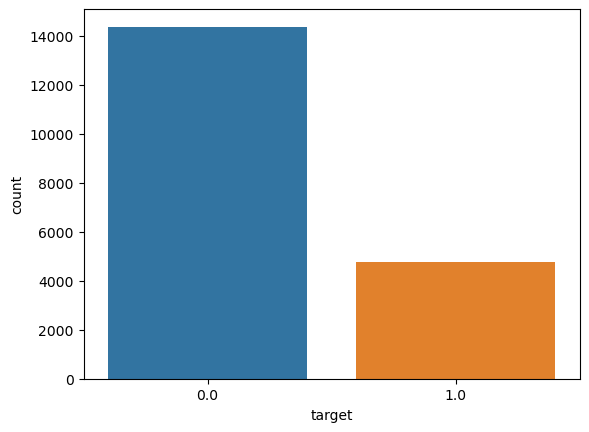

In [77]:
sns.countplot(x=df["target"])

32) Создайте новую переменную **df_label**, присвойте ей трансформированный датасет df при помощи One-hot кодирования (лучше использовать pandas.get_dummies() для бинаризации)

- Примените drop_first = True
- Не забудьте удалить индексы ('enrollee_id')

In [80]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ins = pd.get_dummies(df, columns=['gender', 'region'], drop_first=True)
df_label = ohe.fit_transform(df)
df_label

In [81]:
def get_metrics(y_test, y_pred, y_score, name):
    df_metrics = pd.DataFrame()

    df_metrics['model'] = [name]

    # Основные метрики для задачи классификации
    df_metrics['Accuracy'] = accuracy_score(y_test, y_pred)
    df_metrics['ROC_AUC'] = roc_auc_score(y_test, y_score[:, 1])
    df_metrics['Precision'] = precision_score(y_test, y_pred)
    df_metrics['Recall'] = recall_score(y_test, y_pred)
    df_metrics['f1'] = f1_score(y_test, y_pred)
    df_metrics['Logloss'] = log_loss(y_test, y_score)

    return df_metrics

## Modeling Baseline

33) Разбиение данных на train/test

- Разбейте данные на тренировочные и тестовые test_size=0.25
- Установите константу RAND = 10 в самом начале и используйте далее как random_state
- Не забывайте про стандартизацию
- Установите stratify=y
- Не забывайте, что нужно для записи данных в переменную X удалить целевую переменную target

In [34]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt



# разделяем его на 2 выборки
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=RAND)

34) Примените стандартный метод для логистической регресии из **sklearn**

- Обучите модель на стандартизованных train и получите предсказанные значения на test
- Используйте для baseline параметр **class_weight и random_state**
- Сделайте отдельный вывод метрик в DataFrame и запишите **результат в переменную metrics**

35) Постройте график кривой ROC-AUC

LogisticRegression: ROC AUC=0.903


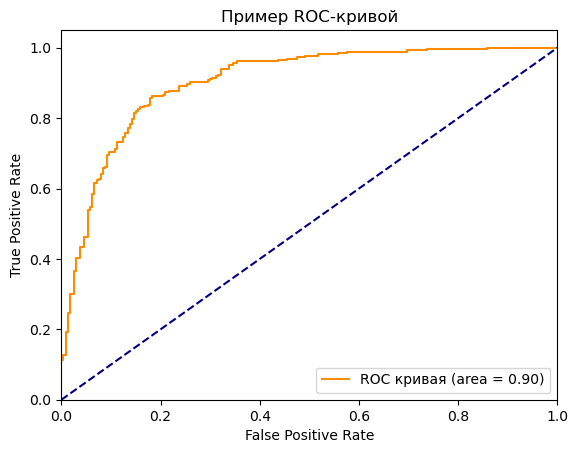

In [87]:

# обучаем модель
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# получаем предказания
lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(testy, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

## GridSearch

36) Найдите параметры для LogisticRegression, используя StratifiedKFold с 3 фолдами, при помощи **GridSearch**

- Метрика для оптимизации scoring = 'roc_auc'

- Нужно использовать такие параметры как: penalty, C, solver, l1_ratio

- Не забудьте для StratifiedKFold зафиксировать random_state и class_weight

In [ ]:
# ваш код

37) Выведите наилучшие значения метрик и параметры после обучения GridSearchCV

In [ ]:
# ваш код

38) Найдите параметры для LogisticRegression, используя StratifiedKFold с 3 фолдами, при помощи **RandomizedSearchCV**

- Метрика для оптимизации scoring = 'roc_auc'

- Нужно использовать такие параметры как: penalty, C, solver, l1_ratio

- Не забудьте для StratifiedKFold зафиксировать random_state и class_weight

In [ ]:
# ваш код

39) Выведите наилучшие значения метрик и параметры после обучения RandomizedSearchCV

In [ ]:
# ваш код

## Holdout

40) Обучение на фолдах на лучших параметрах

- Далее используйте кросс-валидацию со стратификацией **StratifiedKFold с 3мя фолдами** как делали ранее
- Не забудьте для StratifiedKFold зафиксировать **random_state**
- Подайте на вход модели LogisticRegression() **наилучшие параметры**, полученные путем поиска по сетке (выбрать между параметрами GridSearchCV и RandomizedSearchCV по значениям метрик - атрибут *.best_score_)
- В качестве метрики возьмите **ROC_AUC**
- Не забывайте использовать стандартизованные данные 
- На каждом фолде подсчитать значение **ROC-AUC на validation** данных и **вывести**
- Выведите по итогу **среднее значение ROC-AUC** полученное на всех фолдах

In [ ]:
# ваш код

41) Получите **предсказанные значения на Holdout** данных при помощи усреднения значений (для вероятностй) и моды (для меток классов), полученных при обучении на фолдах

**Сравните** результат ROC-AUC на validation (OOF) и на test данных (Holdout)


Подсказка:
- для получения средних значений на Holdout используйте np.mean(np.column_stack(****), axis=1)
- для получения моды на Holdout используйте stats.mode(np.column_stack(****), axis=1)[0]

In [ ]:
# ваш код

42) Добавьте в датасет с метриками **metrics** результаты обучения модели с **StratifiedKFold на Holdout данных**.

Где вы получили самые наилучшие результаты?

In [ ]:
# ваш код

Улучшились ли результаты на Holdout по сравнению c Baseline? **Если нет, попробуйте тщательнее подобрать значения в методах поиска по сетке и снова посмотрите результаты.**

# Задание со звездочкой

Найти гиперпараметры для LogisticRegression при помощи **Optuna**, предварительно установив библиотеку. Использовать аналогичный подход с использованием кросс-валидации. Необходимо при помощи Optuna улучить результаты с прошлыми обученными моделями, только в этом случае задание засчитывается.

Пример того как находить параметры и как получить итоговый результат:

https://github.com/miracl1e6/nyc-taxi-trip-duration/blob/master/nyc-taxi-lgboost-lama.ipynb

Дополнительные материалы, которые могут помочь разобраться:
- https://optuna.org
- https://github.com/optuna/optuna
- https://coderzcolumn.com/tutorials/machine-learning/simple-guide-to-optuna-for-hyperparameters-optimization-tuning


Пример как можно при разных регуляризаторах добавить условия:
```python
if param_grid['solver'] in ['sag', 'lbfgs']:
        param_grid['penalty'] = trial.suggest_categorical("penalty", ['l2', 'none'])
        
```

- ‘newton-cg’ - [‘l2’, ‘none’]
- ‘lbfgs’ - [‘l2’, ‘none’]
- ‘liblinear’ - [‘l1’, ‘l2’]
- ‘sag’ - [‘l2’, ‘none’]
- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

In [ ]:
# ваш код